### Variational Autoencoder Network Model

## Train for 20 epochs

Observe the loss decreasing while training.

We train 2 models: one with only 3 latent variables and one with 20.

In [18]:
%%capture
!python VariationalAutoEncoder.py --max_epochs=20 --latent_variables=3
!python VariationalAutoEncoder.py --max_epochs=20 --latent_variables=20

## Inspect logs
⚠️ Make sure to **Stop** the cell execution after observing the logs


In [5]:
!tensorboard --logdir=./lightning_logs

^C


## Load trained model
Checkpoints are saved incrementally for each training session under `./lightning_logs/version_X`.

In [27]:
__import__("sys").path.append("..")
import utils
from VariationalAutoEncoder import VariationalAutoEncoder

model_3 = utils.load_trained_model_for_evaluation(VariationalAutoEncoder, 0)
model_20 = utils.load_trained_model_for_evaluation(VariationalAutoEncoder, 1)

print(model_20)

VariationalAutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_mu): Linear(in_features=196, out_features=20, bias=True)
  (fc_logvar): Linear(in_features=196, out_features=20, bias=True)
  (dec_fc): Linear(in_features=20, out_features=196, bias=True)
  (decoder): Sequential(
    (0): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
    (3): Sigmoid()
  )
)


## Generate similar MNIST images
Observe that the model is not detetministic!

            Original image <-------------> 3 Latent variables <---------------> 20 Latent variables


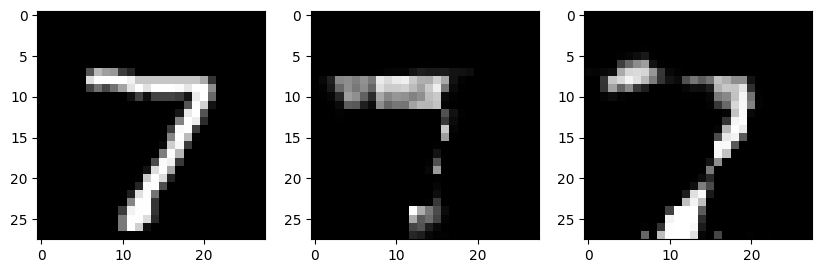

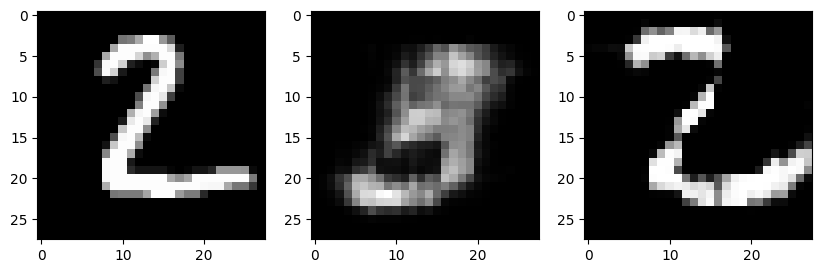

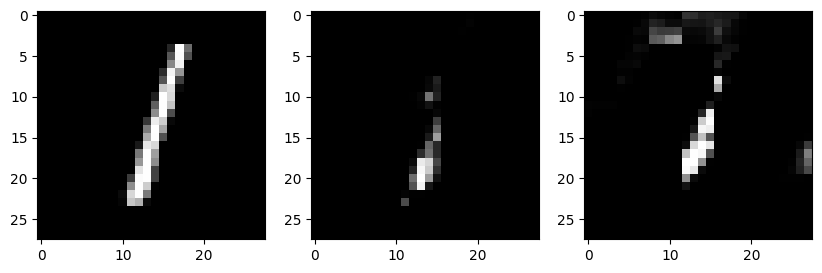

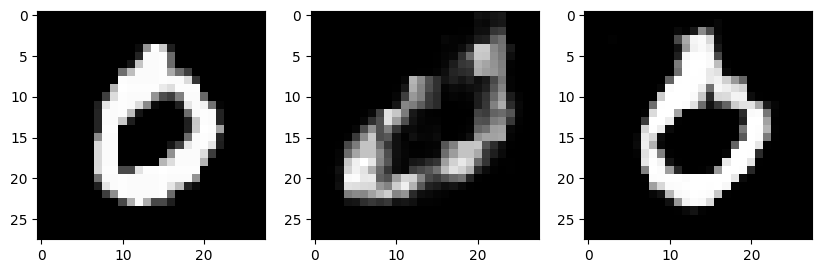

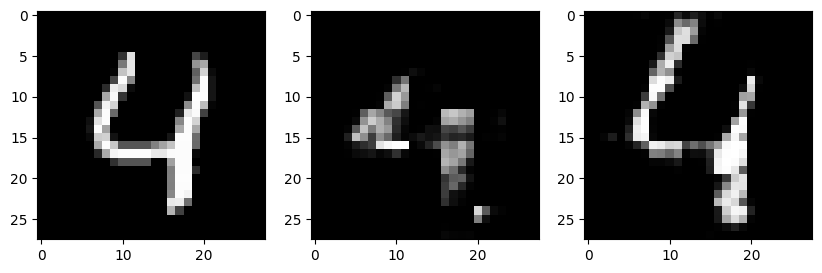

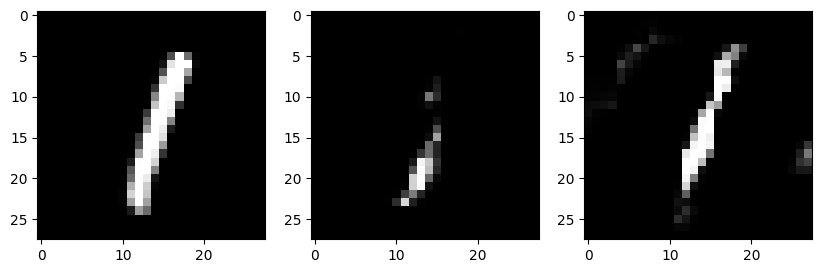

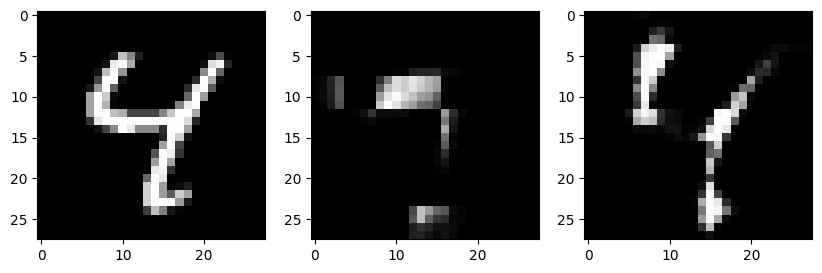

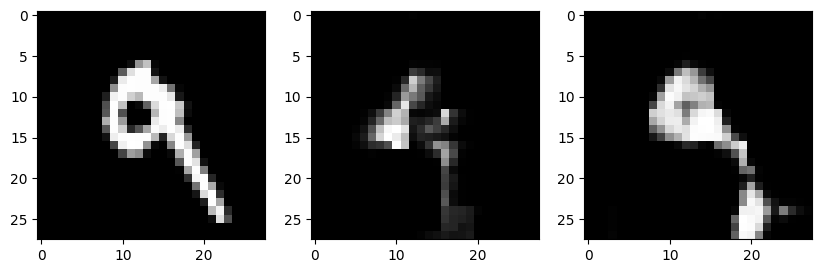

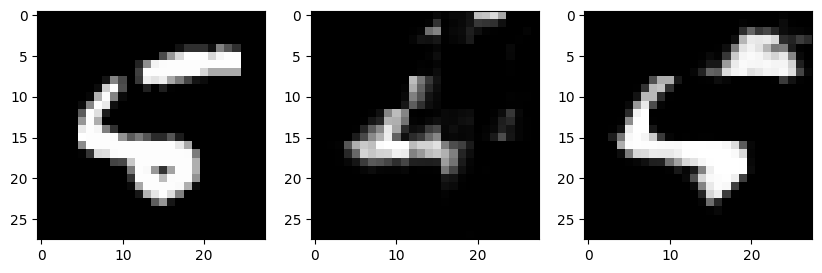

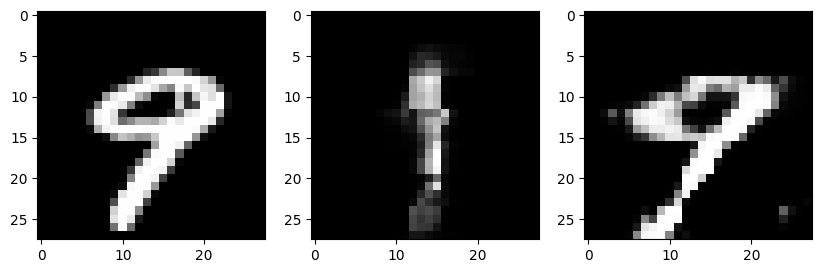

In [33]:
import torch

model_3.setup('test')

print("            Original image <-------------> 3 Latent variables <---------------> 20 Latent variables")

for i in range(0, 10):
    orig_img, _ = model_3.mnist_test[i]
    orig_img = orig_img.view(1, 1, 28, 28)
    predicted_img_2, _, _ = model_3(orig_img)
    predicted_img_20, _, _ = model_20(orig_img)
    utils.plot_images([
        orig_img.view(28, 28), 
        predicted_img_2.detach().view(28, 28),
        predicted_img_20.detach().view(28, 28)
    ], figsize=(10,10))

## Generate digits from random samples

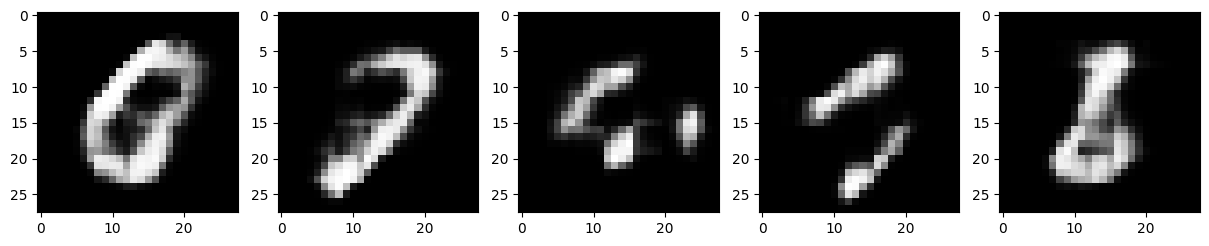

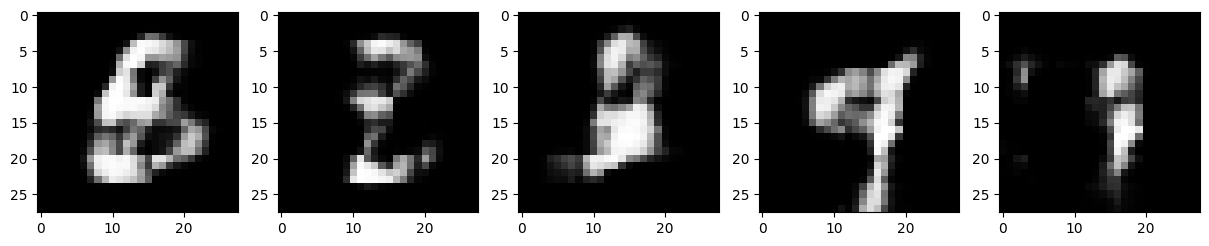

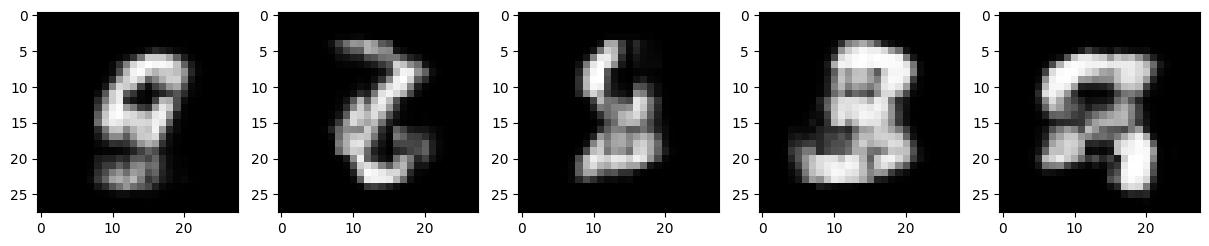

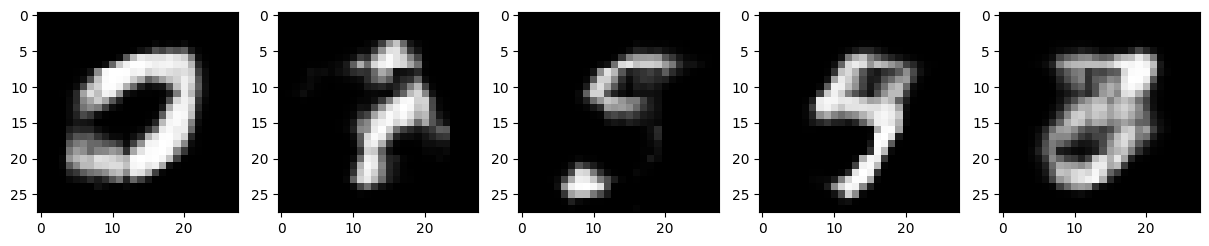

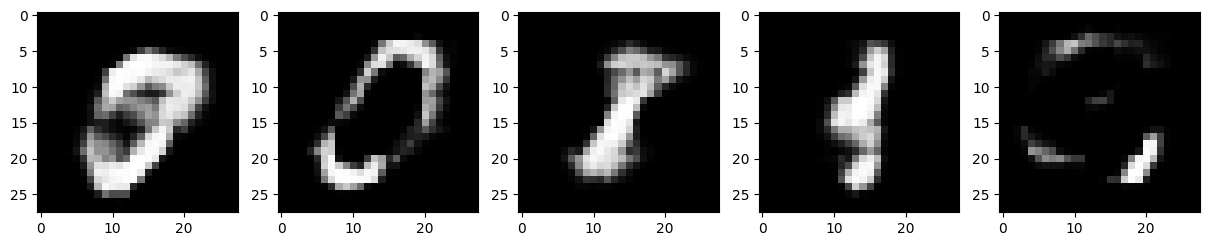

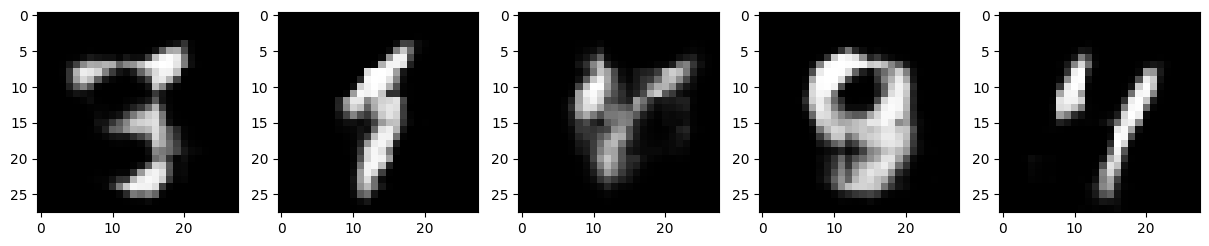

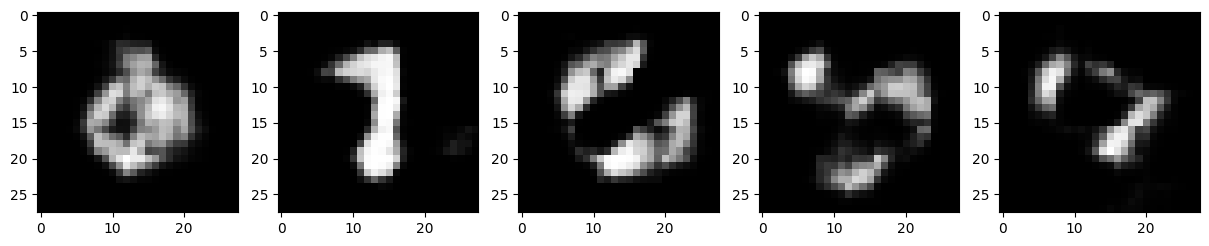

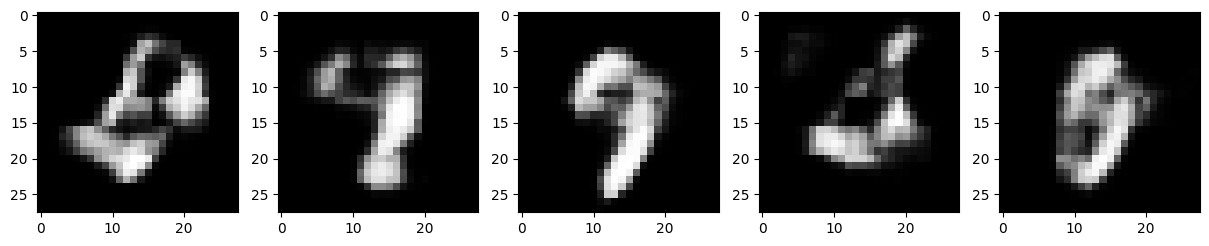

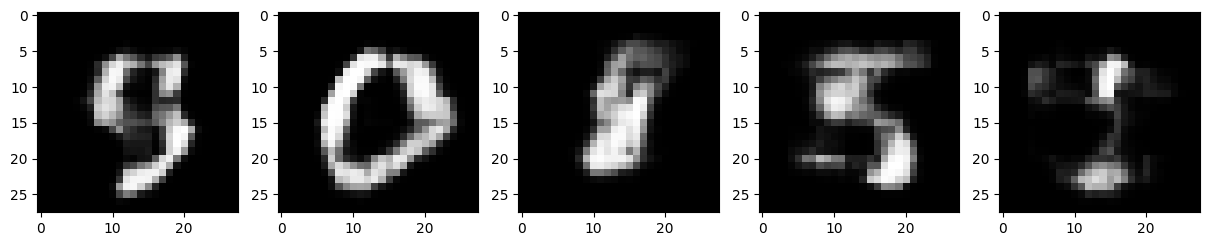

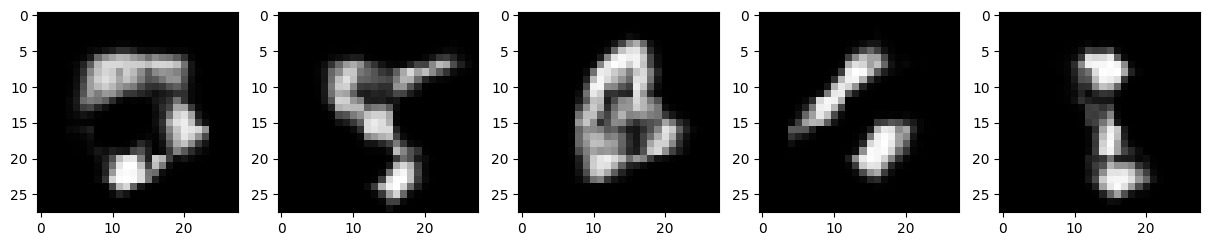

In [37]:
latent_variables = model_20.hparams.latent_variables
num_samples = 5

for i in range(0, 10):
    x = torch.randn(num_samples, latent_variables)
    x = model_20.decode(x).detach()
    utils.plot_images([x[i,].view(28, 28) for i in range(0, num_samples)], figsize=(num_samples*3,10))
